# Import necessary Python Modules


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')



# DATA EXPLORATION

In [2]:
#loadindg the data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
#print first 5 rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Data Summary
df.shape

(891, 12)

In [4]:
#find duplicates
df.duplicated().sum()

0

In [5]:
#checing datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Name, Sex, Ticket, Cabin & Embarked = Object DataType (Categorical)
#Age & Fare = Float DataType (Continous)
#Rest = integer DataType ()

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Dropping Unnecessary Columns
1) PassengerId = This column only gives the value of each passenger's ID and contributes nothing in the prediction

2) Name = This column only gives the value of each passenger's Name and contributes nothing in the prediction

3) Cabin = This column only gives the value of each passenger's Cabin and contributes nothing in the prediction

4) Embarked = This column only gives the value of each passenger's source and contributes nothing in the prediction

Hence we are dropping the above mentioned columns



In [8]:
df=df.drop(columns = ['PassengerId', 'Name','Cabin', 'Ticket', 'Embarked'])
df = df.reset_index()
df = df.drop(columns = 'index')

In [9]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#checking null values in dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

# ENCODING
1) LABEL ENCODING = Sex column, to encode object dataType to int DataType

2) Simple Imputing = Age column, For Nan values

In [11]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex']=df2

In [12]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [13]:
#Imputing Nan values in Age column using Simple Imputer
from sklearn.impute import SimpleImputer
si = SimpleImputer()
df2 = pd.DataFrame(si.fit_transform(df[['Age']]),columns=['Age'])
df['Age']=df2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [14]:
#checking null values in dataset
df.isnull().sum().sum()

0

In [15]:
#find duplicates
df.duplicated().sum()

114

In [16]:
#Drop Duplicates
df = df.drop_duplicates()
df = df.reset_index()
df = df.drop(columns = 'index')

In [17]:
#find duplicates
df.duplicated().sum()


0

In [18]:
df.shape


(777, 7)

In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.413127,2.243243,0.625483,29.803641,0.527671,0.419562,34.933285
std,0.492712,0.854813,0.484310,13.732021,0.989412,0.839752,52.337382
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,16.100000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#value of each class
df['Survived'].unique()

array([0, 1], dtype=int64)

0    456
1    321
Name: Survived, dtype: int64


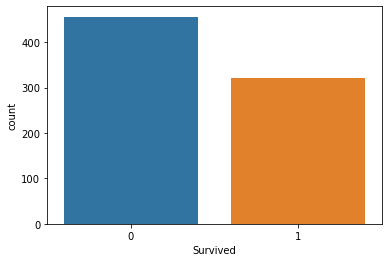

In [21]:
#count of each class (Survived(1) = 321, Notsurvived(0)=456)
ax=sns.countplot(x="Survived", data=df)
print(df['Survived'].value_counts())

# We have an imbalanced data set which we will upsample using SMOTE after the train_test_split


In [22]:
#Checking Correlation
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336811,-0.511844,-0.078239,-0.038018,0.069518,0.246927
Pclass,-0.336811,1.000000,0.117611,-0.338731,0.088784,0.040756,-0.551794
Sex,-0.511844,0.117611,1.000000,0.092571,-0.098019,-0.237349,-0.169542
Age,-0.078239,-0.338731,0.092571,1.000000,-0.280466,-0.187355,0.090394
SibSp,-0.038018,0.088784,-0.098019,-0.280466,1.000000,0.379961,0.133207
Parch,0.069518,0.040756,-0.237349,-0.187355,0.379961,1.000000,0.190250
Fare,0.246927,-0.551794,-0.169542,0.090394,0.133207,0.190250,1.000000


<AxesSubplot:>

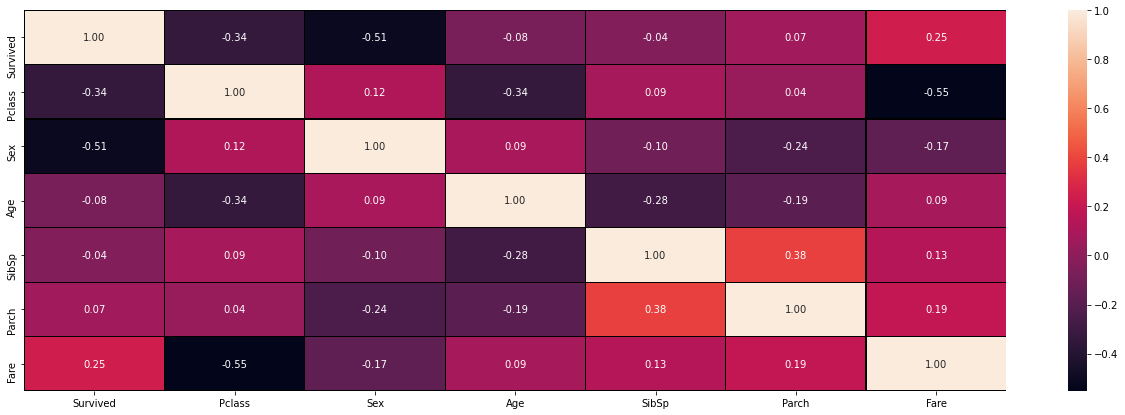

In [23]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [24]:
#Correlation with the target column
corr_mat=df.corr()
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.246927
Parch       0.069518
SibSp      -0.038018
Age        -0.078239
Pclass     -0.336811
Sex        -0.511844
Name: Survived, dtype: float64

# DATA VISUALISATION


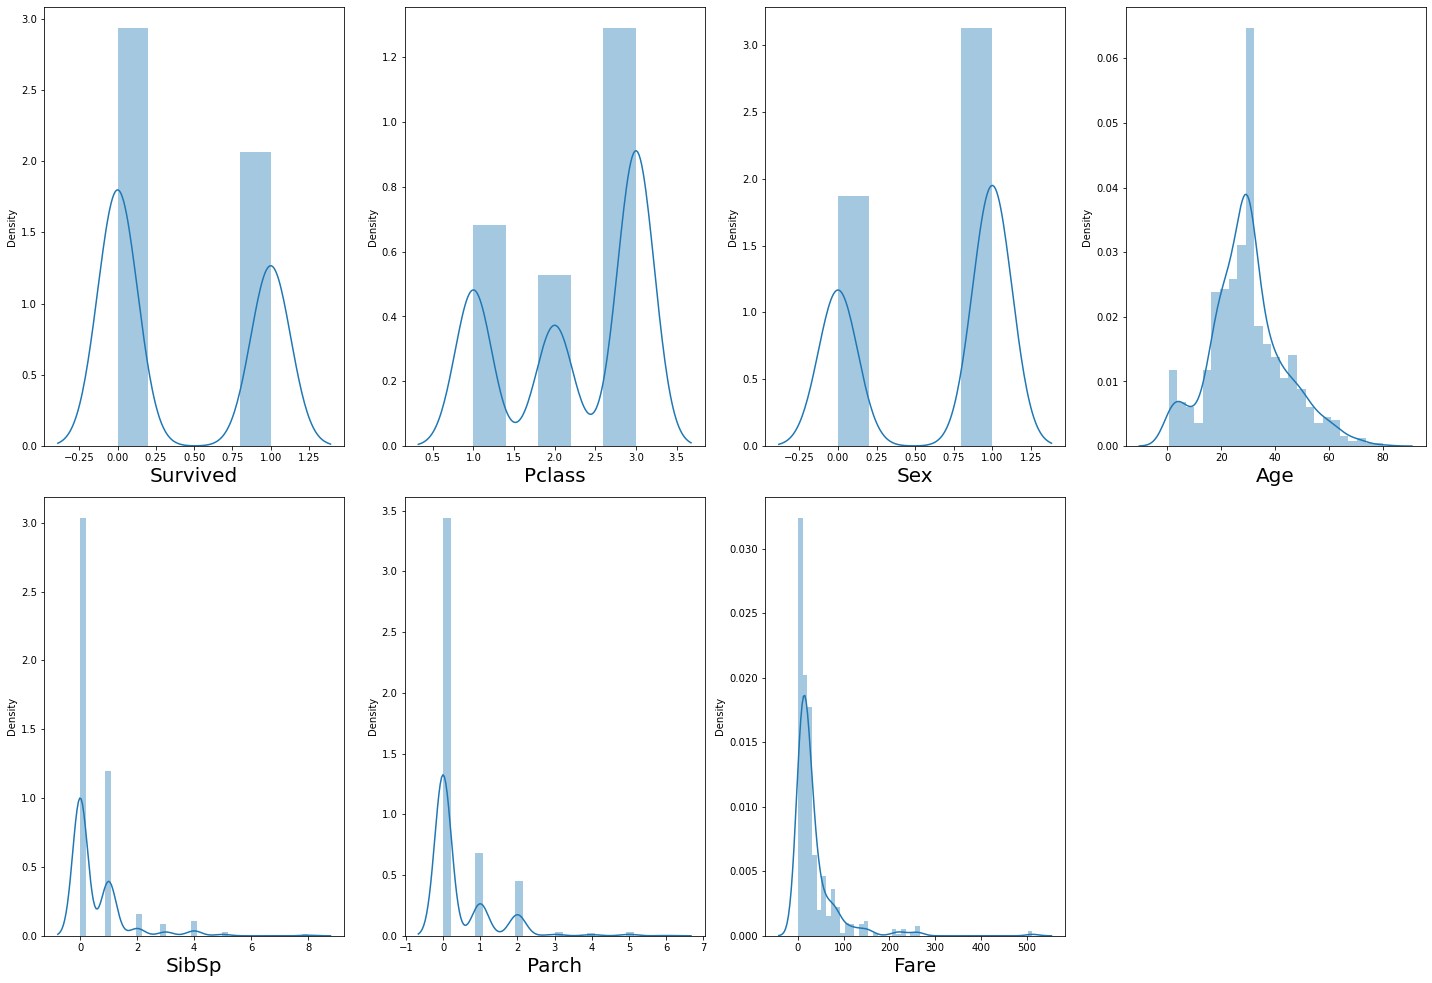

In [25]:
#Checking the skewness of the data (Visually) using DISTPLOT
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [26]:
#Checking skewness of each of the features
df.skew().sort_values(ascending=False)

Fare        4.553853
SibSp       3.040372
Parch       2.617726
Age         0.395824
Survived    0.353540
Pclass     -0.488069
Sex        -0.519529
dtype: float64

In [27]:
#saved the original values of the target label
target_column = df['Survived']
target_column

0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 777, dtype: int64

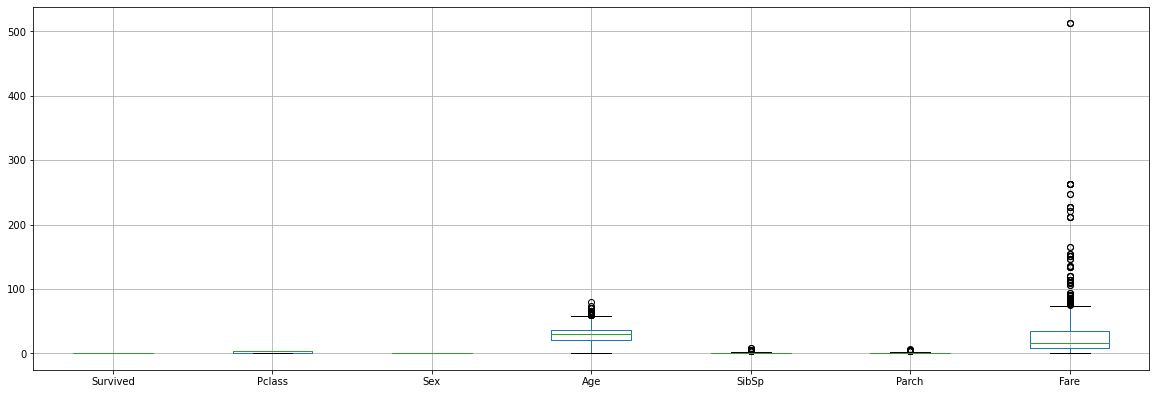

In [28]:
#chekcing the outliers through BOXPLOT
df.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET


In [29]:
#We can see skewness in most of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)
df.skew().sort_values(ascending=False) #validating that the skewness is removed

Parch       1.087425
SibSp       0.693420
Survived    0.353540
Age         0.015441
Fare       -0.040284
Pclass     -0.356836
Sex        -0.519529
dtype: float64

In [30]:
#giving target label back its original values
df['Survived'] = target_column
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 777, dtype: int64

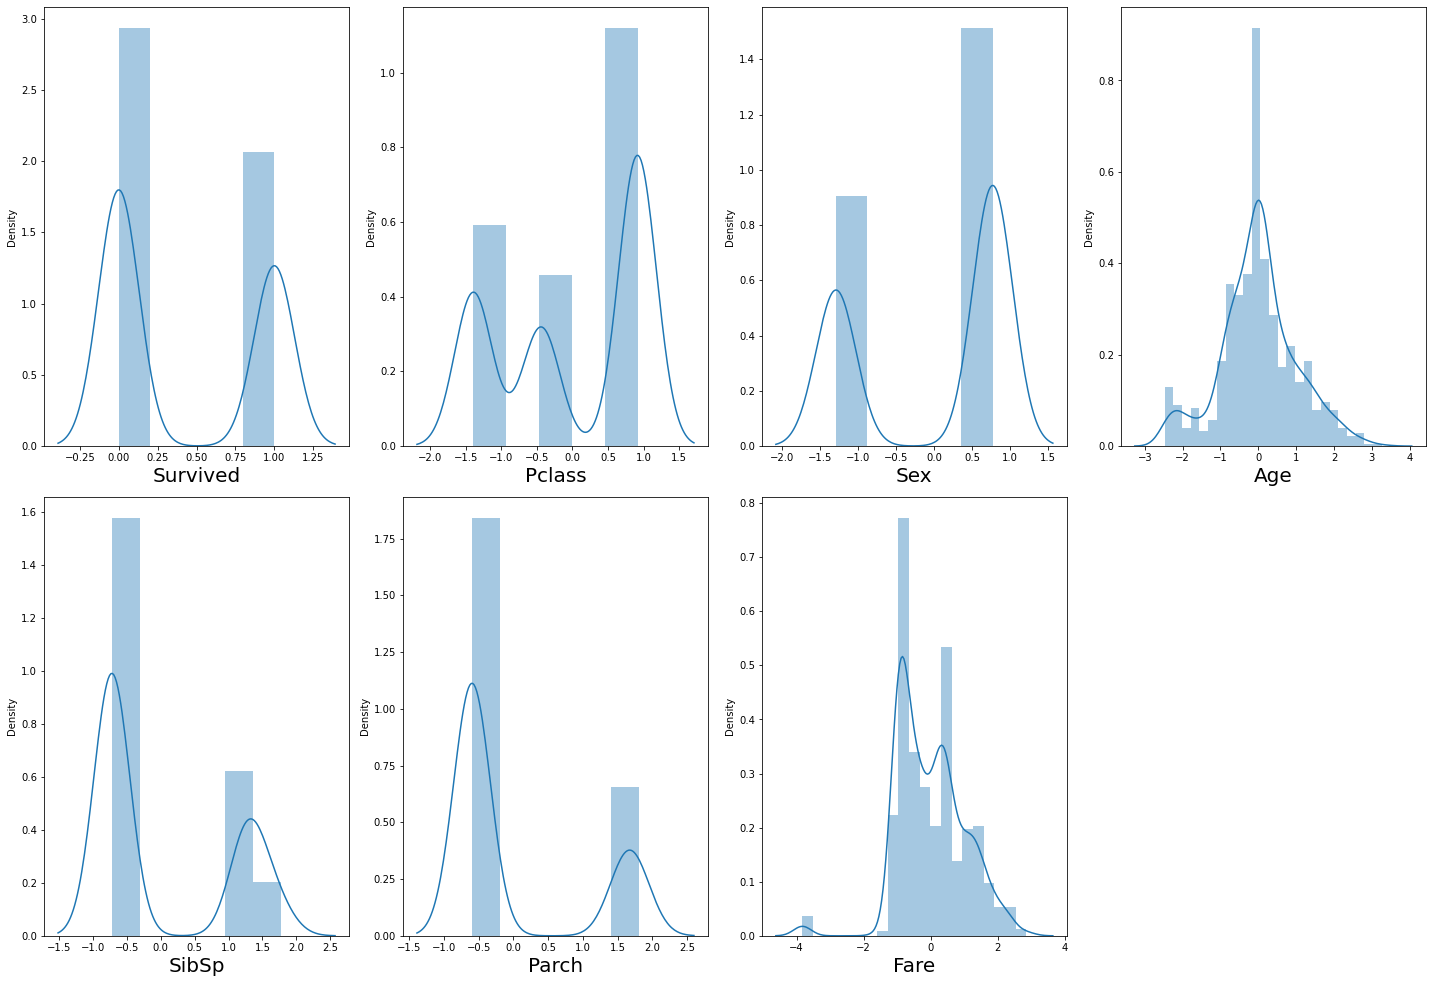

In [31]:
#Rechecking the skewness in the dataset through Distribution (Dist) Plot
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

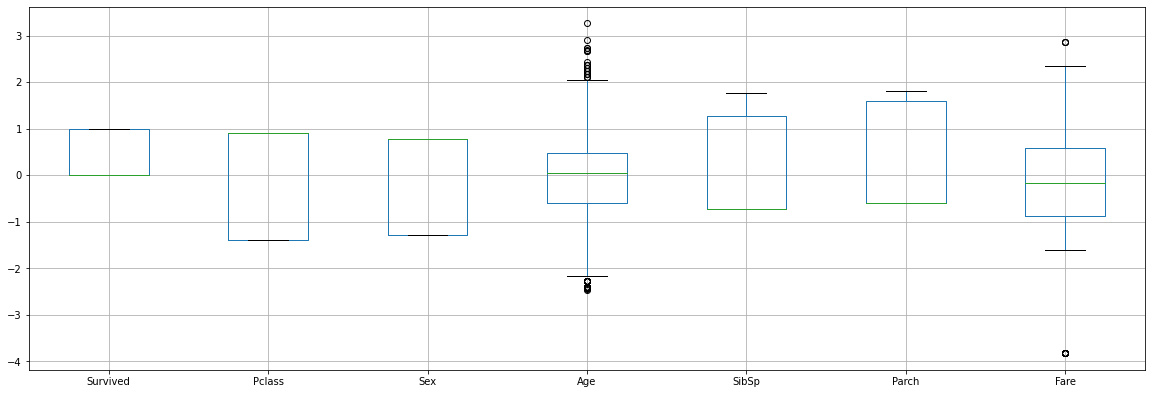

In [32]:
#Rechecking the outliers after power transformation (by using box plot)
df.boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
#Using IQR method to remove outliers
from scipy.stats import iqr
#find the IQR
#1st Quantile
q1=df.quantile(0.25)
#3rd Quantile
q3=df.quantile(0.75)

iqr = q3-q1

In [34]:
#feature = Age (outlier in higher side)
Age_high = (q3.Age+(1.5*iqr.Age))
index=np.where(df['Age']>Age_high)
df=df.drop(df.index[index])
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0,0.914744,0.773799,-0.524407,1.279363,-0.596149,-0.992031
1,1,1,-1.390320,-1.292325,0.621501,1.279363,-0.596149,1.263485
2,2,1,0.914744,-1.292325,-0.225991,-0.719932,-0.596149,-0.899645
3,3,1,-1.390320,-1.292325,0.415277,1.279363,-0.596149,0.995210
4,4,0,0.914744,0.773799,0.415277,-0.719932,-0.596149,-0.883396
...,...,...,...,...,...,...,...,...
751,772,0,0.914744,-1.292325,0.689523,-0.719932,1.804297,0.423850
752,773,1,-1.390320,-1.292325,-0.755106,-0.719932,-0.596149,0.452734
753,774,0,0.914744,-1.292325,0.042107,1.279363,1.759456,0.210264
754,775,1,-1.390320,0.773799,-0.225991,-0.719932,-0.596149,0.452734


In [35]:
df['Survived']


0      0
1      1
2      1
3      1
4      0
      ..
772    0
773    1
774    0
775    1
776    0
Name: Survived, Length: 756, dtype: int64

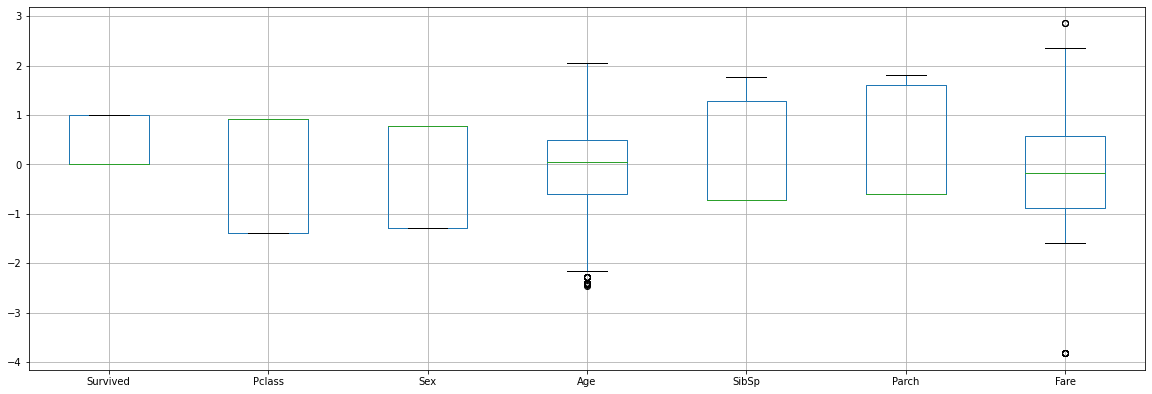

In [36]:
#Rechecking the outliers using boxplot after using IQR method
df.boxplot(figsize=[20,8])  
plt.subplots_adjust(bottom=0.25)
plt.show()

In [37]:
df.shape


(756, 7)

In [38]:
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# DIVIDE DATA INTO FEATURES & LABEL


In [39]:
#Divide data set into features & label
y=df['Survived']
X=df.drop(columns=['Survived'])

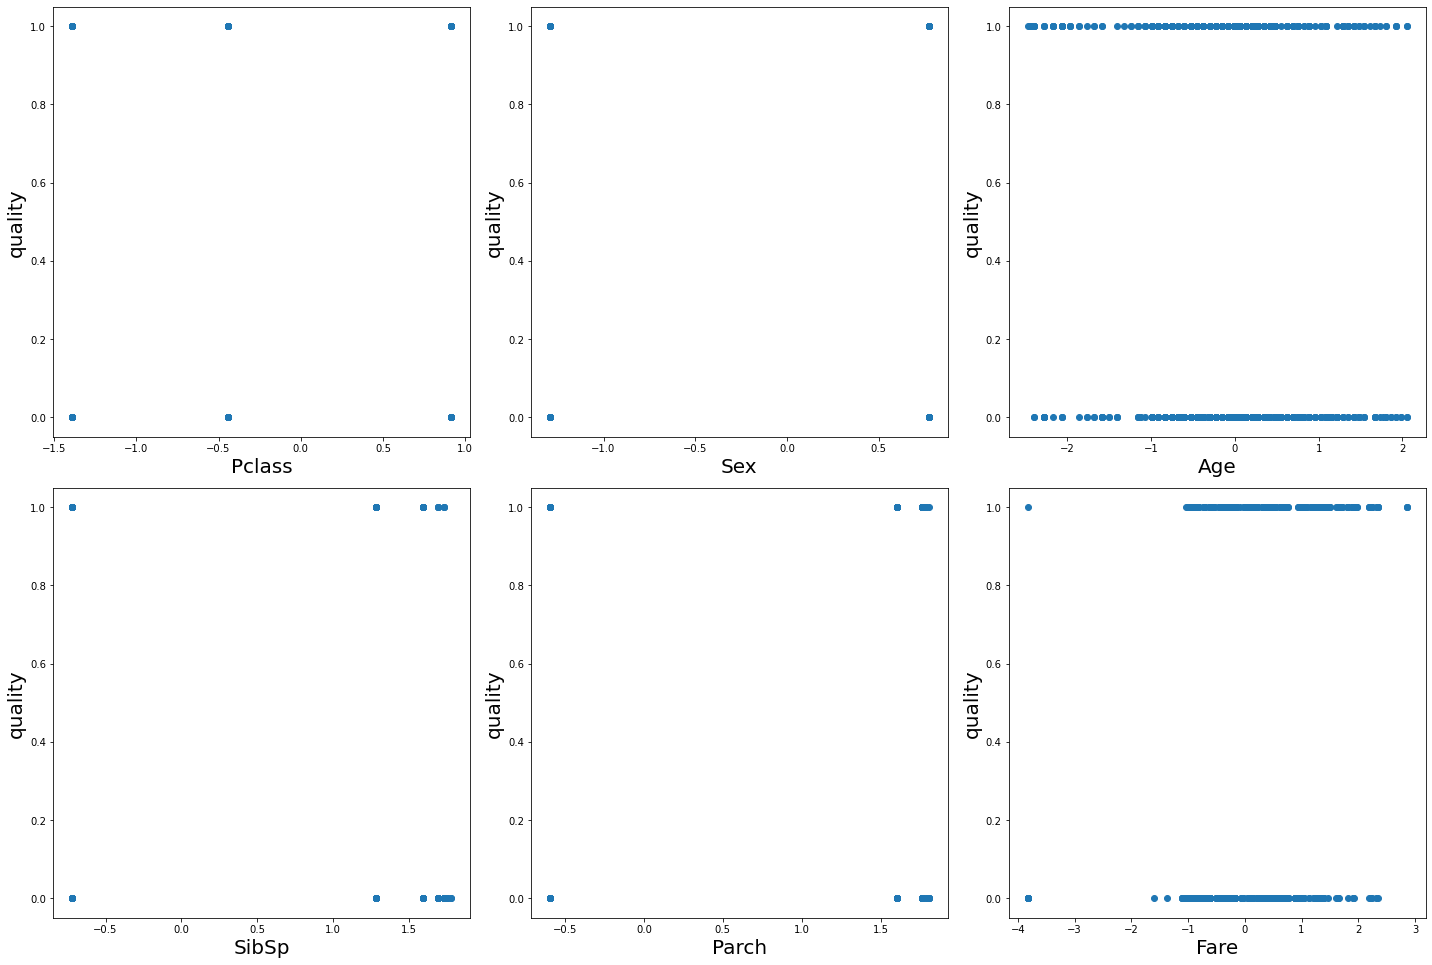

In [40]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [41]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.8281938325991189 on Random State 44


In [44]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X_scaled, y, test_size=0.30, random_state=44)

# USING SMOTE FOR UPSAMPLING


In [45]:

conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





  environment location: C:\Users\dines\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py38haa244fe_1        1016 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.13.0-py38haa244fe_1




imbalanced-learn-0.7 | 97 KB     |            |   0% 
imbala

In [46]:
#USING SMOTE FOR UPSAMPLING


In [47]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
ove_smp=SMOTE(0.99)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({0: 312, 1: 217})
The no of samples after fit() Counter({0: 312, 1: 308})


In [48]:
print(y_train_ns.value_counts())


0    312
1    308
Name: Survived, dtype: int64


In [49]:
x_train = x_train_ns

In [50]:
y_train = y_train_ns

# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [51]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 81.4977973568282
[[107  21]
 [ 21  78]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       128
           1       0.79      0.79      0.79        99

    accuracy                           0.81       227
   macro avg       0.81      0.81      0.81       227
weighted avg       0.81      0.81      0.81       227



In [52]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 74.44933920704845
[[104  24]
 [ 34  65]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       128
           1       0.73      0.66      0.69        99

    accuracy                           0.74       227
   macro avg       0.74      0.73      0.74       227
weighted avg       0.74      0.74      0.74       227



In [53]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 78.41409691629956
[[111  17]
 [ 32  67]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       128
           1       0.80      0.68      0.73        99

    accuracy                           0.78       227
   macro avg       0.79      0.77      0.78       227
weighted avg       0.79      0.78      0.78       227



In [54]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 80.61674008810573
[[119   9]
 [ 35  64]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       128
           1       0.88      0.65      0.74        99

    accuracy                           0.81       227
   macro avg       0.82      0.79      0.79       227
weighted avg       0.82      0.81      0.80       227



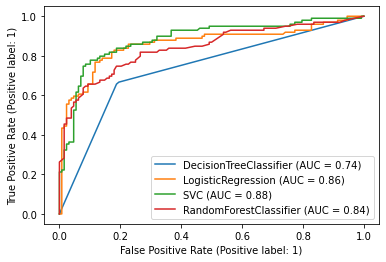

In [55]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [56]:
#Logistic Regression, Random Forest and SVC are producing good accuracy. 
#Now we will check cross validation score as well for overfitting. 

In [57]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())

Cross validation score of Logistic Regression Model 0.7659201812478216
Cross validation score of Random Forest Model 0.7686127570582084
Cross validation score of Decision Tree Model 0.7329121645172534
Cross validation score of SVC Model 0.7897438131753224


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': np.arange(0.1,10,0.1),
              'gamma': np.arange(0.1,1,0.1)
             }
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 1.1, 'gamma': 0.5}

In [60]:
svc = SVC(C=1.1, gamma=0.5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.84      0.69      0.76        99

    accuracy                           0.81       227
   macro avg       0.81      0.79      0.80       227
weighted avg       0.81      0.81      0.80       227



In [61]:
GCV = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best parameters
accuracy_score(y_test,GCV_pred) #checking final accuracy

0.8061674008810573

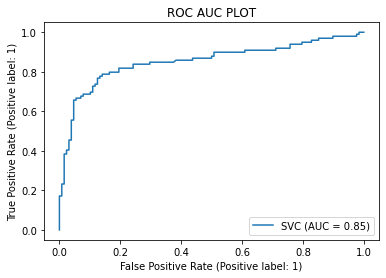

In [62]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

In [63]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(GCV.best_estimator_,"Titanic.pkl")

['Titanic.pkl']